## Final Project Submission

Please fill out: 
* Student name: Eunice Njeri nduati
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: MaryAnne Mwikali
* Blog post URL:


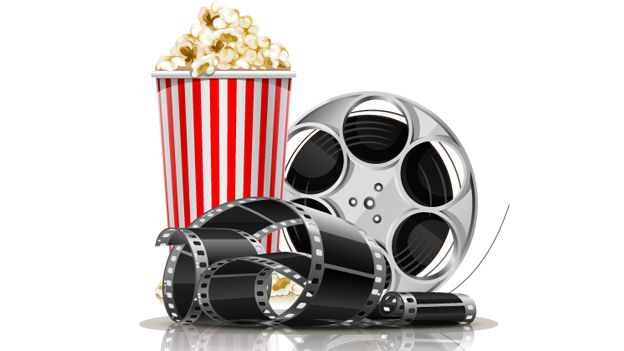


## Project Overview
The aim of the project is to provide insight and recommendations to Microsoft Company on their new movie making business proposal.In order to make informed recommendation, I will explore financial data for high profit making genres and their unique characteristics. With the findings, I will make data-driven suggestions to the Microsoft Company stakeholders.

## Problem Statement
Which type of movies and genres should Microsoft consider to maximize on their Return on Investment?

## Questions to consider
1. Is movies industry a profitable venture?
2. Which is the genre with the highest Return on Investment(RoI)?
3. Which is the best season to release movies with high RoI?

## Data Mining

I will start with importing the relavant libraries.

In [2]:
# import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

### 1. Is movies industry a profitable venture?

First I need to analyze whether the movie market is a profitable venture for my client to explore. I will start with by exloring the financial information from the movie_budgets csv data. This will help in calculating the Return on Investment.

In [3]:
budget= pd.read_csv ("C:/Users/Eunice Nduati/Documents/Flatiron/Phase_1/dsc-phase-1-project/zippedData/tn.movie_budgets.csv.gz")
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### Data Cleaning
I need to understand the dataset I am working with and adjust where needed to enable me work with it for analysis and visualization.

In [4]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


From the above information, there are 5782 entries in the budget dataframe. All the entries except id are currently formatted as objects. In order to work with the dataset, some need to be changed like the dollar amounts to integers and release_date to datetime.


In [5]:
#I'll start by converting all the dollar entries to integers and apply to the relevant columns.
relevant_cols=['production_budget','domestic_gross','worldwide_gross']
budget[relevant_cols]=budget[relevant_cols].replace({'\$': '', ',': ''}, regex=True)
budget['production_budget']=budget['production_budget'].apply(int)
budget['domestic_gross']=budget['domestic_gross'].apply(int)
budget['worldwide_gross']=budget['worldwide_gross'].apply(int)

In [6]:
#To change the release date to date time and exract month and year
budget['release_date'] = pd.to_datetime(budget['release_date'])
budget['release_year'] = budget['release_date'].dt.year
budget['release_month'] = budget['release_date'].dt.month
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,6
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12


In [7]:
#To check whether the changes have taken place
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
 6   release_year       5782 non-null   int64         
 7   release_month      5782 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 361.5+ KB



#### Data Exploration
To understand more about this data, I need to dig deeper 

In [8]:
# To look at the dataframe values
budget.describe()

,id,production_budget,domestic_gross,worldwide_gross,release_year,release_month
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000,5782.000000
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,2003.967139,7.050675
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,12.724386,3.480147
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,1915.000000,1.000000
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,2000.000000,4.000000
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,2007.000000,7.000000
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,2012.000000,10.000000
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2020.000000,12.000000


From the release year, we saw that the years span from 1915 to 2020. I will limit my data from year 2010 to 2020 as the factors might have changed overtime.This dataset will be more reasonable to work with.

In [9]:
#Selecting dataset upto year 2020
budget=budget[budget['release_year']>=2010]

To find out is the business idea is profitable, I need to calculate RoI. RoI is a calculation of monetary value of an investment versus its cost.

In [10]:
#To calculate Return on Investment(ROI) in percentage and create a new column
total_revenue=budget['worldwide_gross']+ budget['domestic_gross']- budget['production_budget']
roi= (total_revenue/budget['production_budget'])*100
roi

1       213.377435
2       -44.992943
3       463.224389
4       511.010451
5       877.115505
           ...    
5761   -100.000000
5771   -100.000000
5772      1.866667
5777   -100.000000
5780   -100.000000
Length: 2194, dtype: float64

In [11]:
#Next we create a Return On Investment(ROI) column for this data.
budget['roi'] = roi
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,roi
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5,213.377435
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,6,-44.992943
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,463.224389
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12,511.010451
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,12,877.115505


Some movies had a profit of 0. Since I am interested with profitable movies, I will proceed with movies whose profits translate to a RoI above 0 only in the cell below.

In [12]:
#Selecting data with RoI above 0
budget = budget[budget['roi'] > 0]
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,roi
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5,213.377435
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,463.224389
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12,511.010451
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,12,877.115505
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018,4,808.983227


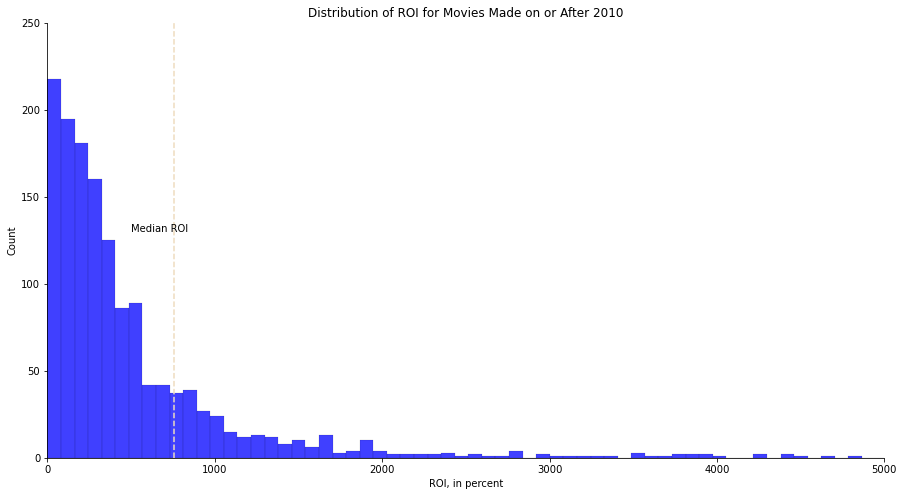

In [12]:
# plot distribution of ROI for movies made on or after 2010
fig,ax = plt.subplots(figsize=(15,8))
sns.histplot(data=budget, x='roi', color='blue')
ax.set(xlim=(0,5000),
    ylim=(0,250),
    title='Distribution of ROI for Movies Made on or After 2010',
    xlabel='ROI, in percent')
sns.despine(fig=fig,top=True,right=True)
ax.axvline(budget['roi'].quantile(q=.8),color='#eedcbe').set_linestyle('--')
ax.text(500,130,'Median ROI');


In [14]:
#To check the top movies by ROI
budget.sort_values('roi', ascending=False).head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,roi
5679,80,2015-07-10,The Gallows,100000,22764410,41656474,2015,7,64320.884000
5211,12,2012-01-06,The Devil Inside,1000000,53262945,101759490,2012,1,15402.243500
5189,90,2014-03-21,Godâs Not Dead,1150000,60755732,63777092,2014,3,10728.941217
5062,63,2011-04-01,Insidious,1500000,54009150,99870886,2011,4,10158.669067
5213,14,2015-04-17,Unfriended,1000000,32789645,64364198,2015,4,9615.384300


In [15]:
#To find out more about the ROI column
budget['roi'].describe()

count     1435.000000
mean       619.363304
std       1959.737746
min          0.428891
25%        141.619820
50%        302.492786
75%        599.326469
max      64320.884000
Name: roi, dtype: float64

Conclusion:

There is significant variability in the ROI data, with a mean of 6.19 and a standard deviation of 19.59. The top half of performers have an ROI of 3% or higher, indicating that they roughly double their investment.
This is a good indicator that movies industry is a profitable venture. Now, I need to look at the characteristics of the genres with the highest returns to advise further.

### 2. Which genres have the greatest Return on Investment?
This information will be obtained by joining the dataframe with the genre and title information to our budget dataframe. From the datasets provided, the information is in the imdb.title.basics.csv. We need to import this data in order to proceed.

In [16]:
imdb_title= pd.read_csv ("C:/Users/Eunice Nduati/Documents/Flatiron/Phase_1/dsc-phase-1-project/zippedData/imdb.title.basics.csv.gz")
imdb_title.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [17]:
#Let's get more information about our dataset
imdb_title.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


From the above summary, our years range from 2010 to 2115. Year 2115 is an error which needs to be rectified


In [18]:
#Checking for more information of our dataset
imdb_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [19]:
#This data has some duplicate titles. They need to be checked before merging
imdb_title['primary_title'].nunique()

136071

In [20]:
#To check the duplicates
imdb_title[imdb_title.duplicated('primary_title')]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
706,tt10022974,Nemesis,Nemesis,2019,NaN,"Action,Thriller"
948,tt10064536,Untitled Disney Marvel Film,Untitled Disney Marvel Film,2022,NaN,Action
949,tt10064558,Untitled Marvel Film,Untitled Marvel Film,2021,NaN,Action
1478,tt10127292,Plushtubers: The Apocalypse,Plushtubers: The Apocalypse,2019,NaN,"Action,Adventure"
1622,tt10148772,Indemnity,Indemnity,2018,45.0,Thriller
...,...,...,...,...,...,...
146119,tt9913594,Bacchanalia,Bacchanalia,2017,72.0,"Drama,Mystery,Thriller"
146120,tt9913936,Paradise,Paradise,2019,NaN,"Crime,Drama"
146125,tt9914642,Albatross,Albatross,2017,NaN,Documentary
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary


Comparing primary_title and original_title, some of the duplicate appear to be actual copies and others just share a title name. I will limit the data to movies upto 2020 and remove those with null values.

In [21]:
#limiting data to 2020 and dropping null values
imdb_title = imdb_title[imdb_title['start_year'] <= 2020]
imdb_title = imdb_title.dropna(axis = 0)

In [22]:
#To check whether the duplicates have been cleared
imdb_title['primary_title'].nunique()

105471

There's still a significant number of duplicate titles. To reduce this further, I will do an inner join with the budgets dataframe.

In [23]:
#merging the two dataframes based on the titles.
movies = pd.merge(budget, imdb_title, how = 'inner', left_on = 'movie', right_on = 'primary_title')
movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5,213.377435,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
1,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,463.224389,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
2,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018,4,808.983227,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
3,9,2017-11-17,Justice League,300000000,229024295,655945209,2017,11,194.989835,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy"
4,10,2015-11-06,Spectre,300000000,200074175,879620923,2015,11,259.898366,tt2379713,Spectre,Spectre,2015,148.0,"Action,Adventure,Thriller"


Since the left dataframe had fewer rows than the resulting join, we know that there are still duplicated titles. Some of these will be due to two or more different movies that share a title. Because we want the movies based on ROI, I will drop the columns where the release year on the right does not match the start year on the left.

In [24]:
#To keep only movies whose release dates match
movies = movies.loc[movies['release_year'] == movies['start_year']]
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1148 entries, 0 to 1590
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1148 non-null   int64         
 1   release_date       1148 non-null   datetime64[ns]
 2   movie              1148 non-null   object        
 3   production_budget  1148 non-null   int64         
 4   domestic_gross     1148 non-null   int64         
 5   worldwide_gross    1148 non-null   int64         
 6   release_year       1148 non-null   int64         
 7   release_month      1148 non-null   int64         
 8   roi                1148 non-null   float64       
 9   tconst             1148 non-null   object        
 10  primary_title      1148 non-null   object        
 11  original_title     1148 non-null   object        
 12  start_year         1148 non-null   int64         
 13  runtime_minutes    1148 non-null   float64       
 14  genres  

In [25]:
#check for duplicated titles
movies['primary_title'].nunique()

1115

From the info table above, there are 1147 primary titles. Out of these, 1114 are unique. Therefore there are 33 duplicated titles. We need to inspect further the duplicated titles.

In [26]:
#Inspect the duplicates
movies[movies.duplicated('primary_title')].iloc[:10]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres
31,9,2018-11-21,Robin Hood,99000000,30824628,84747441,2018,11,16.739464,tt4532826,Robin Hood,Robin Hood,2018,116.0,"Action,Adventure,Thriller"
41,51,2010-03-05,Alice in Wonderland,200000000,334191110,1025491110,2010,3,579.841110,tt2049386,Alice in Wonderland,Alice in Wonderland,2010,99.0,"Fantasy,Musical"
86,2,2017-11-22,Coco,175000000,209726015,798008101,2017,11,475.848066,tt7002100,Coco,Coco,2017,98.0,Horror
182,44,2015-03-27,Home,130000000,177397510,385997896,2015,3,333.381082,tt5121236,Home,Home,2015,15.0,Documentary
184,44,2015-03-27,Home,130000000,177397510,385997896,2015,3,333.381082,tt5775862,Home,Innocent,2015,4.0,Drama
185,44,2015-03-27,Home,130000000,177397510,385997896,2015,3,333.381082,tt5884960,Home,Home,2015,58.0,Documentary
255,84,2014-07-25,Hercules,100000000,72688614,243388614,2014,7,216.077228,tt3985956,Hercules,Hercules,2014,112.0,Comedy
272,13,2015-03-13,Cinderella,95000000,201151353,534551353,2015,3,674.423901,tt5089556,Cinderella,Cinderella,2015,113.0,Fantasy
671,96,2011-09-23,Abduction,35000000,28087155,86648359,2011,9,227.815754,tt2447982,Abduction,Abduction,2011,84.0,"Horror,Thriller"
684,33,2015-09-30,The Walk,35000000,10161183,61492104,2015,9,104.723677,tt3488710,The Walk,The Walk,2015,123.0,"Adventure,Biography,Drama"


Some appear to be different. Since it will be difficult to know which has the highest roi from the other, I will drop the duplicated titles and work with a clean dataset.

In [27]:
#Dropping the rows with duplicated titles
movies = movies[movies.duplicated('primary_title') == False].reset_index(drop = True)

To make my dataframe easier to work with, I will drop some rows that will not be of use in further analysis or joining with other dataframes.

In [28]:
#Drop unneeded columns
movies = movies.drop(labels = ['id','release_date','primary_title', 'original_title'], axis = 1)

In [29]:
#To check whether all changes have been effected
movies.head()


,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,roi,tconst,start_year,runtime_minutes,genres
0,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5,213.377435,tt1298650,2011,136.0,"Action,Adventure,Fantasy"
1,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,463.224389,tt2395427,2015,141.0,"Action,Adventure,Sci-Fi"
2,Avengers: Infinity War,300000000,678815482,2048134200,2018,4,808.983227,tt4154756,2018,149.0,"Action,Adventure,Sci-Fi"
3,Justice League,300000000,229024295,655945209,2017,11,194.989835,tt0974015,2017,120.0,"Action,Adventure,Fantasy"
4,Spectre,300000000,200074175,879620923,2015,11,259.898366,tt2379713,2015,148.0,"Action,Adventure,Thriller"


In [30]:
len(movies)

1115

Some movies have more than one genres. I need to set each in their individual columns to proceed

In [31]:
# I will use .explode to set each genre as an individual column
movies['Genres'] = movies['genres'].apply(lambda x: x.split(',')) #split genre column
movies=movies.explode('Genres')
movies.head()

,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,roi,tconst,start_year,runtime_minutes,genres,Genres
0,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5,213.377435,tt1298650,2011,136.0,"Action,Adventure,Fantasy",Action
0,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5,213.377435,tt1298650,2011,136.0,"Action,Adventure,Fantasy",Adventure
0,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5,213.377435,tt1298650,2011,136.0,"Action,Adventure,Fantasy",Fantasy
1,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,463.224389,tt2395427,2015,141.0,"Action,Adventure,Sci-Fi",Action
1,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,463.224389,tt2395427,2015,141.0,"Action,Adventure,Sci-Fi",Adventure


In [32]:
#Group the data by genre, aggregated by median ROI in descending order. 
#I will use median instead of mean to limit bias due to presence of outliers
movies_sorted= movies.groupby('Genres').median()['roi'].sort_values(ascending=False)
movies_sorted

Genres
Horror         585.432760
Mystery        574.106400
Musical        558.493157
Documentary    377.687555
Thriller       365.134741
Sci-Fi         355.925135
Romance        350.822367
Animation      333.381082
Music          328.367750
Biography      327.703046
Comedy         319.111889
Drama          308.510158
Adventure      288.612166
Sport          273.812654
Family         259.651337
Action         257.289006
Fantasy        248.397895
Crime          241.156516
History        238.166611
War            238.141269
Western        184.397568
Name: roi, dtype: float64

To better understand which genres are the most profitable, two lists will be created for unique genres and the median roi. From this, we create a DataFrame that will be used to present the genres_roi information on a bargraph.

In [33]:
#To sort the movie genres
movies_sorted.index

Index(['Horror', 'Mystery', 'Musical', 'Documentary', 'Thriller', 'Sci-Fi',
       'Romance', 'Animation', 'Music', 'Biography', 'Comedy', 'Drama',
       'Adventure', 'Sport', 'Family', 'Action', 'Fantasy', 'Crime', 'History',
       'War', 'Western'],
      dtype='object', name='Genres')

In [34]:
#Convert the sorted movie genres to a list and find it's length
genres_list=list(movies_sorted.index)
len(genres_list)

21

In [35]:
#Convert the median_roi data into a list
median_roi=list(movies.groupby('Genres').median()['roi'].sort_values(ascending=False))
len(median_roi)

21

In [37]:
# Create a dataframe with the two lists as columns
genres_roi_df=pd.DataFrame()
genres_roi_df['genrelist']=genres_list
genres_roi_df['medianroi']=median_roi
genres_roi_df

,genrelist,medianroi
0,Horror,585.432760
1,Mystery,574.106400
2,Musical,558.493157
3,Documentary,377.687555
4,Thriller,365.134741
5,Sci-Fi,355.925135
6,Romance,350.822367
7,Animation,333.381082
8,Music,328.367750
9,Biography,327.703046


#### Data Visualization.


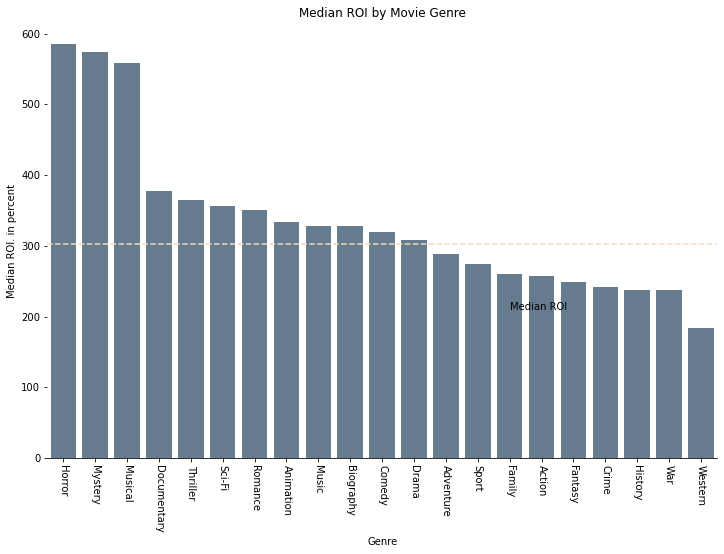

In [38]:
#A bar graph to represent median ROI for each genre
fig, ax = plt.subplots(figsize =(12,8))



sns.barplot(data = genres_roi_df, x = 'genrelist', y = 'medianroi', color = '#5f7d95')
ax.axhline(budget['roi'].median(), color='#eedcbe').set_linestyle('--')
ax.set_xticklabels(labels=genres_roi_df['genrelist'], rotation=270)
ax.set(title = 'Median ROI by Movie Genre',
    xlabel='Genre',
    ylabel='Median ROI. in percent')
sns.despine(fig=fig,top=True, left=True)
ax.text(14, 210, 'Median ROI');



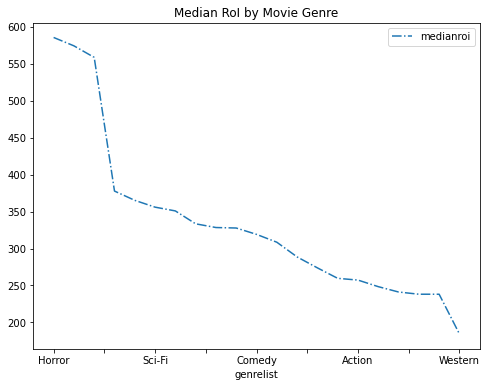

In [64]:
#Plot a line graph representing genres_roi_df

mystyle=['-.']
genres_roi_df.plot.line(title='Median RoI by Movie Genre', figsize=(8,6), x='genrelist', y='medianroi',
                        use_index=True, legend=True, style=mystyle);




In [39]:
#To find the top five genres that have the highest Return on Investment
movies_sorted.head(5)

Genres
Horror         585.432760
Mystery        574.106400
Musical        558.493157
Documentary    377.687555
Thriller       365.134741
Name: roi, dtype: float64

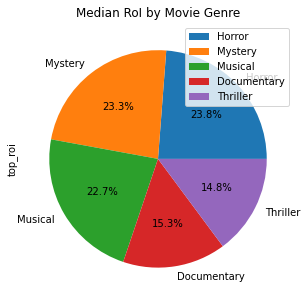

In [60]:
# A pie-chart showing the top five movie genres with the highest RoI.
#Make two list of top five roi values and top five genres.
top_five_roi=movies_sorted.head(5).tolist()
top_five_genres=movies_sorted.head(5).index.tolist()

#Initialize a dataframe and use the two lists as columns
top_five_df=pd.DataFrame()
top_five_df['top_roi']=top_five_roi
top_five_df['top_genres']=top_five_genres

# Plot a pie-chart, add labels and percentages for comparison
my_labels= movies_sorted.head(5).index.tolist()
plot=top_five_df.plot.pie(title='Median RoI by Movie Genre',y='top_roi', figsize=(5,5),autopct='%1.1f%%', labels=my_labels)


Conclusion:

From the analysis obtained, it indicates that Horror, Mystery, Musical,Documentary and Thriller have the leading Return on Investment. I strongly advise to consider any of these genres for production.

### 3. What is the best season to release movies with high ROI?


In [40]:
#create column to show season of release

def season(month):
    if month in [6,7,8]:
        return 'summer' 
    elif month in [9,10,11]:
        return 'fall' 
    elif month in [12,1,2]:
        return 'winter'
    else:
        return 'spring'
    
movies['season'] = movies['release_month'].apply(season)


In [41]:
#caluclate the mean ROI for each season
roi_season = movies.groupby('season')['roi'].mean().reset_index()
roi_season = roi_season.sort_values('roi')
roi_season

,season,roi
1,spring,466.618026
3,winter,537.219774
0,fall,551.101529
2,summer,853.505013


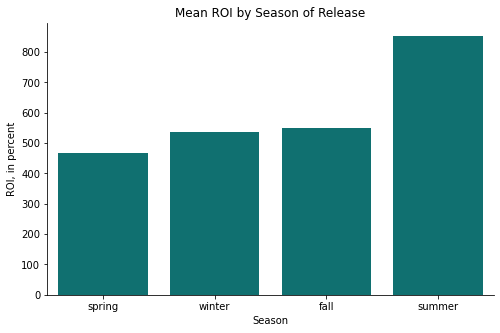

In [68]:
#plot the mean ROI for each season
fig,ax = plt.subplots(figsize=(8,5))
sns.barplot(data = roi_season, x='season', y='roi', color='teal')
ax.set(
    title='Mean ROI by Season of Release',
    xlabel='Season',
    ylabel='ROI, in percent'
    )

sns.despine(top=True, right=True);

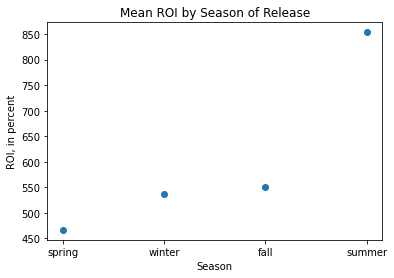

In [43]:
#plot the mean ROI for each season

#create a scatterplot
plt.scatter(roi_season['season'], roi_season['roi'])

#add axis and title labels
plt.title('Mean ROI by Season of Release')
plt.xlabel('Season')
plt.ylabel('ROI, in percent');


From the above presentation, the movies with the highest ROI were released during summer. This seems to be the best season to release movies.

## Recommendations:
1. There is significant variability in the ROI data, with a mean of 6.19 and a standard deviation of 19.59. The top half of performers have an ROI of 3% or higher, indicating that they roughly double their investment. This is a good indicator that movies industry is a profitable venture. It is a recommendable business industry to venture in.

2. Horror, Mystery, Musical, Documentary and Thriller have the leading Return on Investment. I strongly advise to consider any of these genres during production. When wanting to limit production budget, produce horror movies, since they have some of the lowest budgets with a high rate of return.

3. Consider summer releases as compared to the other seasons. 

4. Further research into streaming markets to determine what movies are most profitable in that domain would be highly beneficial.

5. Examine data from 2020-2021 to see the impact that Covid-19 had on movie trends, as some of these may have a lasting impact on the market.